<center> <h2>UNIFACISA - MACHINE LEARNING</h2><h3>Aluno: Adolfo de Luna Matias </h3><h5>Data: 23 de novembro de 2019.</h5></center>

Irei a partir da base de dados do titanic aplicar 3 modelos de aprendizado de máquina para prever possíveis respostas as nossas questões alvo, seriam eles: 
- Regressão Logísitca;
- Arvóres de decisão;
- Floresta aleatória;

<h2>BASE DE DADOS TITANIC</h2>

In [1]:
#importando nossas bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression # modelo de Regressão Logística
from sklearn import metrics # s métricas de avaliação
from sklearn.metrics import confusion_matrix

Particularmente prefiro retirar a base não de arquivos locais, mas sim de repositórios ou websites, mas sempre baixo a versão em caso de remoção online;

In [2]:
#chamando nossa base de dados
base_tita = pd.read_csv('https://raw.githubusercontent.com/talitalobo/EspecializacaoUnifacisa2019/master/dados/titanic3.csv', sep=',')

In [3]:
#vendo o cabeçalho dos dados pelo nosso .head():
base_tita.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**I - Quais os tipos de variáveis temos?**

In [4]:
#informação dos meus dados, observe que existe tatno as variáveis categóricas quanto as númericas:
base_tita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 107.4+ KB


**II -Interpretação do sumário dos meus dados númericos:**

In [5]:
#sumarização dos dados, aqui atráves dos dados númericos são entregues, media, desvio padrão, percentis e etc:
base_tita.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


**III - Quais as minhas variáveis tem dados nulos e faltantes?**

In [6]:
#quais as colunas apresentam dados NaN?  atráves do isnull() e do sum() para somar podemos ver isso:
base_tita.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

**IV - Correlação de features:**

In [7]:
#chamando a correlação entre as variáveis
#fazemos a correlação pois no modelo de regressão logistíca que iremos implantar não podemos ter correlação:
#observe os que tiverem  forem menor que -0.50 e maiores que 0.50, ou seja próximo de -1 e 1, alta correlaçao:
base_tita.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


**V -Separando nosso alvo dos previsores:**

Aqui está o sentido do ensaio, ou seja, o alvo e seus preditores, minha pergunta é baseado nos preditores:<br>

Nosso alvo é saber quem sobriveu então vamos utlizar a coluna, survived como classe:<br>
Suvived: Informa se o passageiro sobreviveu ao desastre. 0 = Não; 1 = Sim


In [8]:
#separando a nossa classe pelo .iloc que faz a busca por número da coluna:
classe = base_tita.iloc[:, 1].values


Logo nossos previsores serão:

pclass: Classe na qual o passageiro viajou, mas vamos transofrmar mais trede em 0 ou 1, rico ou pobre;<br>
sex: sexo do passageiro;<br>
age: Idade do passageiro;<br>
sibsp: Informa a quantidade de irmãos e cônjuges que o paciente possuía na embarcação;<br>
parch: Quantidade de crianças e idosos (pais) relativos ao passageiro;<br>
fare: Valor da passagem

In [9]:
#aqui chamamos então nosso previsores:
previsores  = base_tita.loc[:, ['pclass','sex', 'age', 'sibsp', 'parch']]

In [10]:
#Aqui estou transformando um dado categórico em númerico, o OneHotEncoder faz binarizaçãpo entre 0 e 1, o labelencoder atribui valores n
previsores['pclass']= pd.get_dummies(previsores['pclass'])
previsores['sex']= pd.get_dummies(previsores['sex'])

**VI - Imputando a moda nos dados faltantes**

In [11]:
#imputando pela mediana
from sklearn.impute import SimpleImputer
imputador = SimpleImputer(missing_values= np.nan, strategy ='median')
imputacao = imputador.fit(previsores)
imputacao = imputacao.transform(previsores)

In [12]:
#transformando em um dataframe e dando nome as colunas
previsores = pd.DataFrame(imputacao)
previsores.columns = ['pclass','sex', 'age', 'sibsp', 'parch']

In [13]:
previsores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
pclass    1309 non-null float64
sex       1309 non-null float64
age       1309 non-null float64
sibsp     1309 non-null float64
parch     1309 non-null float64
dtypes: float64(5)
memory usage: 51.2 KB


**VII - Usando um scaler para trazer a métrica dos dados mais próxima (Não Utilizei)**

Regressão logística não necessita de uma métrica padronizada, mas se fosse outro modelo  como o naive bayes teriamos que padronizar ou normalizar, então seria dessaforma:

**VIII - Criando os testes e treinamentos**

O treino e teste do conjunto de dados sinteticamente nos serve para aplicarmos um treinamento do algoritmo nos dados e posteriormente testar os dados e prever se nosso modelo foi validado corretamente.

In [14]:
#criando nosso teste e treinamento, utiizei o modelo padrão 70/30 , porém de acordo com o volume de daods pode reduzir ou aumentar:
# esse modúlo da biblioteca é muito útil para separação e com o random state garanto uma saída sempre igual nos dados:
from sklearn.model_selection import train_test_split
previsores_teste,previsores_treino, classe_teste, classe_treino = train_test_split(previsores,classe, test_size =0.30, random_state=0)

<center><h3>Finalmente aplicando os modelos </h3><center>

**Regressão Logistica**
- Nos possibilita a predição de dados de acordo com os features d variáveis categóricas:

In [15]:
#usando nosso modelo de regressão
modelo_relog = LogisticRegression(solver='lbfgs')
regol = modelo_relog.fit(previsores_treino, classe_treino)
regressao = regol.predict(previsores_teste)


In [16]:
#gerando a matriz de confusão, marca elementos verdadeiros positivos ou falsos positivos e os verdadeiros negativos e falsos negativos:

print(confusion_matrix(classe_teste, regressao))

[[457 106]
 [109 244]]


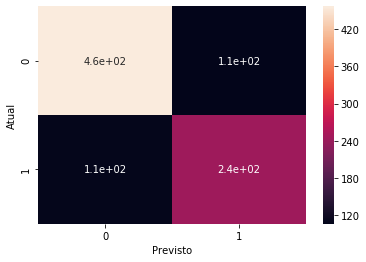

In [17]:
#vamos tornar a visuaização mais sofisticada
matriz_confusao = pd.crosstab(classe_teste, regressao, rownames=['Atual'], colnames=['Previsto'])

# Gera o gráfico da matriz de confusão
sb.heatmap(matriz_confusao, annot = True)

In [18]:
#Gerando os relatórios de precisões e acurácias:
print('Acurácia: ', metrics.accuracy_score(classe_teste, regressao)) 
print('Precisão: ', metrics.precision_score(classe_teste, regressao))
print('Revocação: ', metrics.recall_score(classe_teste, regressao))
print('F1-Measure: ', metrics.f1_score(classe_teste, regressao))
print('ROC AUC: ', metrics.roc_auc_score(classe_teste, regressao))

Acurácia:  0.7652838427947598
Precisão:  0.6971428571428572
Revocação:  0.6912181303116147
F1-Measure:  0.6941678520625889
ROC AUC:  0.7514705216389335


**Árvore de Decisão**
- Pelo modelo de árvore de deicsão são feitos caminhos em que a árvore toma de acordo com regras que ela estabelece em seu algoritmo, esse modelo é muito favorável contra dados faltantes e outliers.

In [19]:
#Importando a biblioteca da nossa árvore de decisão
from sklearn.tree import DecisionTreeClassifier

#ajustando ao nosso modelo de acordo com nossa árvore:
arvo = DecisionTreeClassifier()
decisao = arvo.fit(previsores_treino, classe_treino)
arvores = arvo.predict(previsores_teste)

In [20]:
print(confusion_matrix(classe_teste,arvores))

[[474  89]
 [156 197]]


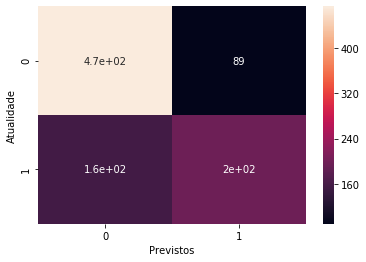

In [21]:
#dando um visual na nossa matriz confusão
matriz_confu = pd.crosstab(classe_teste, arvores, rownames=['Atualidade'], colnames=['Previstos'])
sb.heatmap(matriz_confu, annot = True)                                                          

In [22]:
#visualizando nosso modelo de acurácia e precisão
print("Acurácia: ", metrics.accuracy_score(classe_teste, arvores))
print('Precisão: ', metrics.precision_score(classe_teste, arvores))
print('Revocação: ', metrics.recall_score(classe_teste, arvores))
print('F1-Measure: ', metrics.f1_score(classe_teste, arvores))
print('ROC AUC: ', metrics.roc_auc_score(classe_teste, arvores))

Acurácia:  0.732532751091703
Precisão:  0.6888111888111889
Revocação:  0.5580736543909348
F1-Measure:  0.6165884194053207
ROC AUC:  0.699995974619979


In [23]:
#quais os features mais importantes para determinação da nossa árvore?
importantes_arvores = pd.DataFrame(decisao.feature_importances_ *100,
                              index = previsores_treino.columns,columns =['Importância % na árvore']).sort_values(by= ['Importância % na árvore'],
                                                                                                      ascending=False).round(2)

#observe em graus percentuais os melhores:
importantes_arvores

,Importância % na árvore
age,38.92
sex,36.35
sibsp,10.54
pclass,9.61
parch,4.58


**Floresta Aleatória**
- A floresta de acordo com um conjunto de árvores de decisões nos fornece um resultado mais apurado que o da árvore sozinha, mas isso tem suas vangatens e desvantagens, todavia aplicaremos aqui esse modelo:

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Instanciao objeto da Floresta Aleatória e define o número de árvores a serem utilizadas
floresta = RandomForestClassifier(n_estimators=1000)

# x_train, x_test, y_train, y_test

# Treinamento do modelo
floresta = floresta.fit(previsores_treino, classe_treino)

# Prevê a partir dos preditores de testes
jungle = floresta.predict(previsores_teste)


In [25]:
#odelos de acurácia e precisao da nossa floresta:
print("Acurácia: ", metrics.accuracy_score(classe_teste, jungle))
print('Precisão: ', metrics.precision_score(classe_teste, jungle))
print('Revocação: ', metrics.recall_score(classe_teste, jungle))
print('F1-Measure: ', metrics.f1_score(classe_teste, jungle))
print('ROC AUC: ', metrics.roc_auc_score(classe_teste, jungle))

Acurácia:  0.7532751091703057
Precisão:  0.7095709570957096
Revocação:  0.6090651558073654
F1-Measure:  0.6554878048780488
ROC AUC:  0.7263798247953346


In [26]:
#quais os features mais importantes para determinação da nossa floresta
importantes_arvores = pd.DataFrame(floresta.feature_importances_ *100,
                              index = previsores_treino.columns,columns =['Importância % na floresta']).sort_values(by= ['Importância % na floresta'],
                                                                                                      ascending=False).round(2)

importantes_arvores

,Importância % na floresta
age,42.73
sex,30.00
pclass,9.81
sibsp,8.92
parch,8.54


**Qual modelo escolher então?**

Isso irá depender do que queremos como objetivo mediante a uma questão que você ou o cliente tem como meta para atingir. Todavia podemos olhar pelo modelo atráves das probabilidades entre verdadeiros positivos e falsos positivos, isso seria o modelo ROC que faz essa probabilidadedo pelo número de vezes que o classificador acertou a previsão contra o número de vezes que o classificador erra previsão.

O AUC é um grau de separabilidade entre os falsos positivos e verdadeiros positivos:

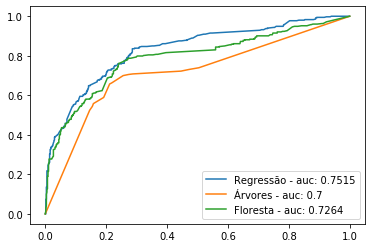

In [27]:
#Aqui vamos aplicar um modeo gráfico para o AUC de todos os 3 modelos
reg_logistica = regol.predict_proba(previsores_teste)[::, 1]
fpr, tpr, thresholds= metrics.roc_curve(classe_teste,  reg_logistica)

treee = decisao.predict_proba(previsores_teste)[::, 1]
fpr1, tpr1, thresholds= metrics.roc_curve(classe_teste, treee)

jungles = floresta.predict_proba(previsores_teste)[::, 1]
fpr2, tpr2, thresholds = metrics.roc_curve (classe_teste,  jungles)



# aqui os resultados de auc já feitos:
auc = metrics.roc_auc_score(classe_teste, regressao) #logistica
auc1 = metrics.roc_auc_score(classe_teste, arvores)#arvore
auc2 = metrics.roc_auc_score(classe_teste, jungle) #floresta


plt.plot(fpr,tpr, fpr1,tpr1, fpr2,tpr2,)
plt.legend({'Regressão - '+'auc: '+ str(auc.round(4)):[fpr,tpr],
            'Árvores - ' + 'auc: '+ str(auc1.round(4)) :[fpr1,tpr1], 
            'Floresta - ' + 'auc: '+ str(auc2.round(4)) :[fpr2,tpr2] },
           loc=4)
plt.show()
#plt.plot(fpr1, tpr1 ,label="Floresta Aleatória, auc="+str(auc))

O melhor comportamento da probabilidades de AUC foi o modelo de regressão logística como pode ser visualmente conferido.